# How to use the Mortgage Filter

***

Lets start by importing the package and any associated packages.

In [18]:
from mortgage_filter import *

import pandas as pd, numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

### Demo Data: Average housing prices by area in and around Vancouver, British Columbia

- Data Structure:
    - The mortgage filter is currently designed to work on dataframes with two columns.
    - One column for the property/area
    - A second column for the price


In [19]:
properties = pd.read_csv('../data/vancouver_area_testing_set.csv', usecols = [0,1])
properties.head()

,Area,House Price
0,Downtown & Westside,3118200
1,West Vancouver,2743600
2,North Vancouver,1665100
3,Richmond,1581600
4,South Burnaby,1564000


### What properties can we afford?

- Lets assume the following parameters:
    - downpayment of **\$190,000**
    - monthly payments of **\$4,800**|
    - mortgage rate?
    
Since we may not know have a reasonable guess, let's specify a term length.

*The interest rate typically depends on how long the term lasts with the bank.*

Let's try a term of **15 years.**

In [20]:
property_filter(property_data = properties,
                downpayment = 190000,
                mortgage_term = 15,
                max_monthly_payment = 4800)

Lengths greater than 10 years are not typically available. 
Terms must range from 1 to 10 years, but calculation will be performed anyway.
You can afford 5 properties from the 25 you've provided.


,Property/Area,Price,Minimum_Downpayment,Mortgage_Insurance,Principal,Monthly_Payment,Shortest_Amortization,Total_Interest,Net_Cost
20,Pitt Meadows,974800,72480.0,18793.83,803593.83,4767.48,24,569440.84,1563034.67
21,North Delta,972500,72250.0,18702.26,801202.26,4753.29,24,567746.53,1558948.79
22,Maple Ridge,884200,63420.0,0.00,694200.00,4698.63,19,377088.77,1261288.77
23,Abbotsford,873600,62360.0,0.00,683600.00,4782.72,18,349446.77,1223046.77
24,Mission,726000,47600.0,0.00,536000.00,4662.46,13,191344.02,917344.02


### We're left with what?
- We're left with all the affordable home indexes as well as:
    - the listed prices
    - the minimum downpayment (5% of value)
    - the mortgage insurance
    - the principal (price - downpayment) 
    - the optimal monthly payment for the shortest amortization period (years)
    - the cumulative interst
    - the net cost
- We note there's a printed warning saying that terms must be less than or equal to 10 years (banks don't typically offer terms beyond 10 years).

    The function can handles the exception and **extrapolates from the term to interest rate function; however, this could yield misleading interest rates.**
    
    Lets see what the function looks like (interest as a function of term length):

Lengths greater than 10 years are not typically available. 
Terms must range from 1 to 10 years, but calculation will be performed anyway.
Lengths greater than 10 years are not typically available. 
Terms must range from 1 to 10 years, but calculation will be performed anyway.
Lengths greater than 10 years are not typically available. 
Terms must range from 1 to 10 years, but calculation will be performed anyway.
Lengths greater than 10 years are not typically available. 
Terms must range from 1 to 10 years, but calculation will be performed anyway.


<function matplotlib.pyplot.show(close=None, block=None)>

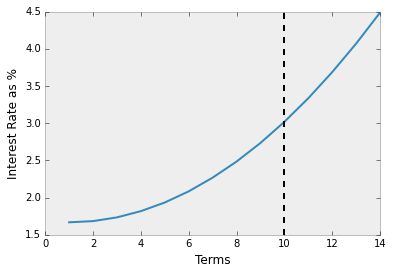

In [21]:
terms = np.arange(1, 15)
rate = [mort_rate(t) for t in terms]
   
plt.plot(terms, rate)
plt.xlabel('Terms'); plt.ylabel('Interest Rate as %')
plt.axvline(x = 10, linestyle='--', color = 'black')
plt.grid()

plt.savefig('output_7_1.svg', transparent = False, format = 'svg')
plt.show

### Okay, now lets try using a mortgage rate of our own, say 2.8%.

In [22]:
property_filter(property_data = properties,
                downpayment = 190000,
                mortgage_rate = 2.8,
                max_monthly_payment = 4800)

You can afford 5 properties from the 25 you've provided.


,Property/Area,Price,Minimum_Downpayment,Mortgage_Insurance,Principal,Monthly_Payment,Shortest_Amortization,Total_Interest,Net_Cost
20,Pitt Meadows,974800,72480.0,18793.83,803593.83,4740.54,18,220350.90,1213944.73
21,North Delta,972500,72250.0,18702.26,801202.26,4726.43,18,219695.22,1210897.48
22,Maple Ridge,884200,63420.0,0.00,694200.00,4727.53,15,156743.49,1040943.49
23,Abbotsford,873600,62360.0,0.00,683600.00,4655.34,15,154350.26,1027950.26
24,Mission,726000,47600.0,0.00,536000.00,4722.69,11,87383.70,813383.70


### Notice how the last 4 columns have lower costs now.

- Lets try one more time with a high downpayment/low monthly payment scenario.
- Lets also assume a loan limit of **\$600,000** and **\$700,000** to see how this might affect a buying decision.

In [23]:
property_filter(property_data = properties,
                downpayment = 500000,
                mortgage_rate = 2.8,
                max_monthly_payment = 3200,
                max_loan = 600000).head()

You can afford 12 properties from the 25 you've provided.


,Property/Area,Price,Minimum_Downpayment,Mortgage_Insurance,Principal,Monthly_Payment,Shortest_Amortization,Total_Interest,Net_Cost
13,Langley,1090800,218160.0,0,590800,3103.53,21,191282.32,1282082.32
14,Cloverdale,1087400,217480.0,0,587400,3199.21,20,180410.55,1267810.55
15,Central Surrey,1086300,217260.0,0,586300,3193.22,20,180065.18,1266365.18
16,Ladner,1042000,208400.0,0,542000,3197.35,18,148627.69,1190627.69
17,Port Coquitlam,1034400,206880.0,0,534400,3152.52,18,146536.03,1180936.03


In [24]:
property_filter(property_data = properties,
                downpayment = 500000,
                mortgage_rate = 2.8,
                max_monthly_payment = 3200,
                max_loan = 700000).head()

You can afford 14 properties from the 25 you've provided.


,Property/Area,Price,Minimum_Downpayment,Mortgage_Insurance,Principal,Monthly_Payment,Shortest_Amortization,Total_Interest,Net_Cost
11,Tsawwassen,1153300,230660.0,0,653300,3117.86,24,244644.99,1397944.99
12,New Westminster,1127200,225440.0,0,627200,3184.83,22,213587.50,1340787.50
13,Langley,1090800,218160.0,0,590800,3103.53,21,191282.32,1282082.32
14,Cloverdale,1087400,217480.0,0,587400,3199.21,20,180410.55,1267810.55
15,Central Surrey,1086300,217260.0,0,586300,3193.22,20,180065.18,1266365.18


### Note that no mortgage insurance is applied.

***In Canada, downpayments >20% of the home price do not require mortgage insurance.***

***

### If you'd like to dive deeper at one scenario in particular, base functions could be used as follows:

1. How quickly does cumulative interest increase as the mortgage rate increases?
2. How does cumulative interest change as monthly contributions increase??
3. How does the amortization period change as as monthly contributions increase?
4. What's my monthly payment on a **\$500,000** home for a 20 year amortization on 2% interest?
5. How does mortgage insurance change with downpayment?


In [25]:
# Parameters
princ = 500000 # principal of 500k
mth_pay = 2000 # monthly payment of 2k
mort_rate = 2.0 # mortgage rate of 2%

Monthly contribution is insufficient to pay off the original Principal.


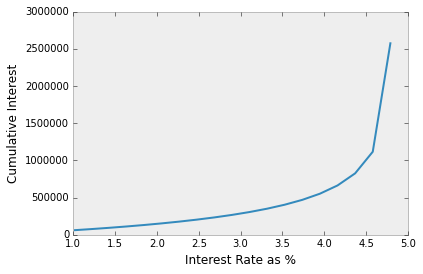

In [26]:
# Question 1

rate = np.linspace(1, 5, 20)
interest = [total_interest(princ, mortgage_rate = i, monthly_payment = mth_pay) for i in rate]

plt.plot(rate, interest)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Interest Rate as %'); plt.ylabel('Cumulative Interest'); plt.grid()

plt.savefig('output_15_1.svg', transparent = False, format = 'svg')
plt.show()

Monthly contribution is insufficient to pay off the original Principal.


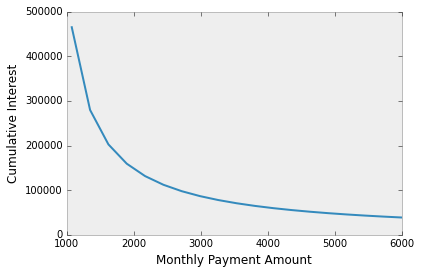

In [27]:
# Question 2

payments = np.linspace(800, 6000, 20)
interest = [total_interest(princ, mort_rate, monthly_payment = p) for p in payments]

plt.plot(payments, interest)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Monthly Payment Amount'); plt.ylabel('Cumulative Interest'); plt.grid()

plt.savefig('output_16_1.svg', transparent = False, format = 'svg')
plt.show()

- Note that as the monthly payment increases, not only does cumulative interest decrease, but the amortization period decreases substantially but this isn't see in the plot above.
- Lets just peek at how the amortization period decreases.

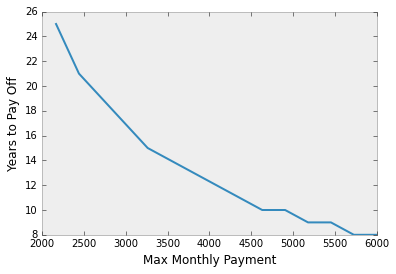

In [28]:
# Question 3

years = [optimal_monthly_payment(princ, mort_rate, max_monthly_payment = p)[1] for p in payments]

plt.plot(payments, years)
plt.xlabel('Max Monthly Payment'); plt.ylabel('Years to Pay Off'); plt.grid()

plt.savefig('output_18_1.svg', transparent = False, format = 'svg')
plt.show()

In [29]:
# Question 4

monthly_payment(princ, mort_rate, amortization = 20)

2529.42

Downpayment must be at least 5% the asset value 
Input value is too low to be legally considered.


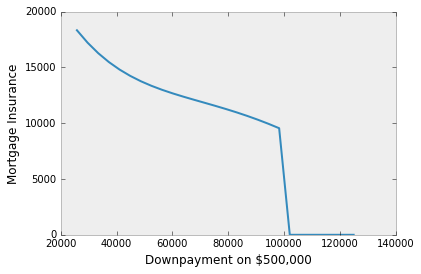

In [30]:
# Question 5
downpayment_size = np.linspace(22000, 125000, 28)
mort_ins = [mortgage_insurance(princ, d) for d in downpayment_size]

plt.plot(downpayment_size, mort_ins)
plt.xlabel('Downpayment on $500,000'); plt.ylabel('Mortgage Insurance'); plt.grid()

plt.savefig('output_20_1.svg', transparent = False, format = 'svg')
plt.show()

 - Notice how a message prints for downpayments less than 5% the property value (minimal downpayment).
 - Also notice how at a downpayment of 20% mortgage insurance no longer applies.
 
***
## Final Notes
#### **I plan to continue adding features as time goes but for now I just wanted to understand and work with the fundamentals.**
#### **If you have more questions or requests please reach out to me at my email, luka.vuko@outlook.com**
***
***A formal documentation is in the works but for now, a call on help will display the function docs:***


In [31]:
help(mortgage_filter)

Help on module mortgage_filter.mortgage_filter in mortgage_filter:

NAME
    mortgage_filter.mortgage_filter - # coding: utf-8

FUNCTIONS
    property_filter(property_data, downpayment, mortgage_rate=None, mortgage_term=None, max_monthly_payment=None, max_loan=None)
        Given a dataframe of properties, their prices, and some basic financial information, it returns a dataframe with only the affordable properties and other affordability metrics (ie. how long it would take to pay off, monthly payments, total interest, etc.).
            
        Arguments
        ----------
        data : dataframe 
            Areas/properties in column index 0 (str)
            Respective prices in column index 1 (numeric) 
            
        downpayment : numeric
            Your maximal possible downpayment
        
        mortgage_rate : numeric 
            Interest rate on the mortgage loan (leave empty if mortgage_term is provided)
        
        mortgage_term : int 
            Contract 

In [32]:
help(total_interest)

Help on function total_interest in module mortgage_filter.mortgage_base:

total_interest(principal, mortgage_rate, monthly_payment)
    Returns the cumulative interest paid on a given principal, mortgage rate, and monthly payment.
    
    Arguments
    ----------
    principal : numeric
    
    mortgage_rate : float
        Annual mortgage rate (loan interest)
    
    amortization: int
        Amortization period in years (or in months if months == True)
        
    monthly_payment : bool 
        Monthly contribution towards the principal
    
    Return
    ------
    float
        Cumulative interest paid



In [33]:
help(optimal_monthly_payment)

Help on function optimal_monthly_payment in module mortgage_filter.mortgage_base:

optimal_monthly_payment(principal, mortgage_rate, max_monthly_payment)
    Returns the first amortization period which has a monthly payment
    less than your max_monthly_payment (ie. within budget). The shortest
    possible amortization period has the lowest long term interest cost.
    
    Arguments
    ----------
    principal : numeric
    
    mortgage_rate : float
          Annual mortgage rate (loan interest)
    
    max_monthly_payment: numeric
        Your max affordable monthly contribution
    
    Return
    ------
    list
        mp: monthly payment for a given amortization
        i: amortization period in years



In [34]:
help(mortgage_insurance)

Help on function mortgage_insurance in module mortgage_filter.mortgage_base:

mortgage_insurance(price, downpayment)
    Returns the cost of mortgage insurance.
    
    Insurance rates are calculated from loan to asset price ratio.
    Rates are applied to the loan to generate a lump sum amount that's
    then added to the principal of the loan to give mortgage insurance.
    
    Arguments
    ----------
    price : numeric
        Property price
    
    downpayment : int or float
        Downpayment on property
        
    Return
    ------
    float
        Mortgage insurance

